In [1]:
import pandas as pd

In [2]:
#read the data
insurance_data=pd.read_csv("insurance.csv")

In [3]:
insurance_data.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [4]:
print(f'{insurance_data.shape[0]} samples and {insurance_data.shape[1]} features in the insurance  dataset.')

1338 samples and 8 features in the insurance  dataset.


#### Understanding the data

In [5]:
#view data types
insurance_data.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#view statistical information.
insurance_data.describe([0.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
50%,39.000000,30.400000,1.000000,9382.033000
99%,64.000000,46.407900,5.000000,48537.480726
max,190.000000,53.130000,5.000000,63770.428010


In [7]:
#information about data

In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [9]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

#### the Data mining tasks

In [10]:
#missing data
total = insurance_data.isnull().sum().sort_values(ascending=False)
percent = (insurance_data.isnull().sum()/insurance_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data.head(20)

,Total missing values,Percent
classif,8,0.005979
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
charges,0,0.000000


In [11]:
rows_with_nan = [index for index, row in insurance_data.iterrows() if row.isnull().any()]

print(rows_with_nan)

[15, 74, 128, 173, 559, 671, 839, 1331]


##### filling the values according to index

In [12]:
for i in rows_with_nan:
    if(int(insurance_data.iloc[i]['bmi'])<18):
        insurance_data.at[i,'classif']="UW"
        
    elif(int(insurance_data.iloc[i]['bmi']) in range(18,25)):
        insurance_data.at[i,'classif']="N"
        
    elif(int(insurance_data.iloc[i]['bmi'])in range(25,30)):
        insurance_data.at[i,'classif']="PREO"
        
    elif(int(insurance_data.iloc[i]['bmi']) in range(30,35)):
        insurance_data.at[i,'classif']="OB1"
        
    elif(int(insurance_data.iloc[i]['bmi'])in range(35,40)):
        insurance_data.at[i,'classif']="OB2"
        
    elif(int(insurance_data.iloc[i]['bmi'])>40):
        insurance_data.at[i,'classif']="OB3"
        

In [13]:
for i in rows_with_nan:
    print(insurance_data.iloc[i]['classif'])

N
PREO
UW
OB1
OB2
OB1
OB1
OB1


In [14]:
#missing data
total = insurance_data.isnull().sum().sort_values(ascending=False)
percent = (insurance_data.isnull().sum()/insurance_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data.head(20)

,Total missing values,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
classif,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [15]:
#checking for duplicate values
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,classif,children,smoker,region,charges
581,19,male,30.59,OB1,0,no,northwest,1639.5631


In [16]:
# Dropping duplicates
insurance_data.drop_duplicates(keep='last',inplace=True)

#### Perform Exploratory Data Analysis (EDA)


#### 1)spearating categorical and numerical columns


In [17]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous




In [18]:
categorical,continuous=separate_data_types(insurance_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical    continuous
-------------  ------------
sex            age
classif        bmi
children       charges
smoker
region


In [19]:

print(continuous)
print(categorical)

['age', 'bmi', 'charges']
['sex', 'classif', 'children', 'smoker', 'region']


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

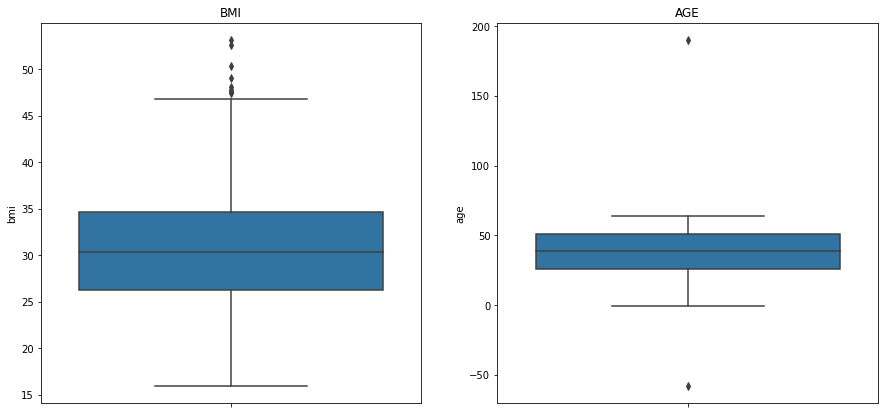

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=insurance_data['bmi'],ax=ax[0]).set(title='BMI')
sns.boxplot(y=insurance_data['age'],ax=ax[1]).set(title='AGE')
plt.show()

#### removing outliers

In [22]:
import numpy as np

In [23]:

print('row and columns before removing outliers:',insurance_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]
    



row and columns before removing outliers: (1337, 8)
wait till shape after removing outlier is printed...


In [24]:
for i in continuous:
    print('i is',i)
    myOutliers(insurance_data,i)
    print('***************************************************')

i is age
the lower range of age is -11.5
the upper range of age is 88.5
total outliers in age are 2
***************************************************
i is bmi
the lower range of bmi is 13.674999999999994
the upper range of bmi is 47.31500000000001
total outliers in bmi are 9
***************************************************
i is charges
the lower range of charges is -13120.716174999998
the upper range of charges is 34524.777625
total outliers in charges are 139
***************************************************


#### Removing Outliers

In [25]:
insurance_data=insurance_data[(insurance_data['age']<=88.5)&(insurance_data['age']>=-11.5)]
insurance_data=insurance_data[(insurance_data['bmi']<=47.315)&(insurance_data['bmi']>=13.674)]
insurance_data.shape    

(1327, 8)

# EDA

### Univariate analysis 

In [26]:
insurance_data['sex'].value_counts().index

Index(['male', 'female'], dtype='object')

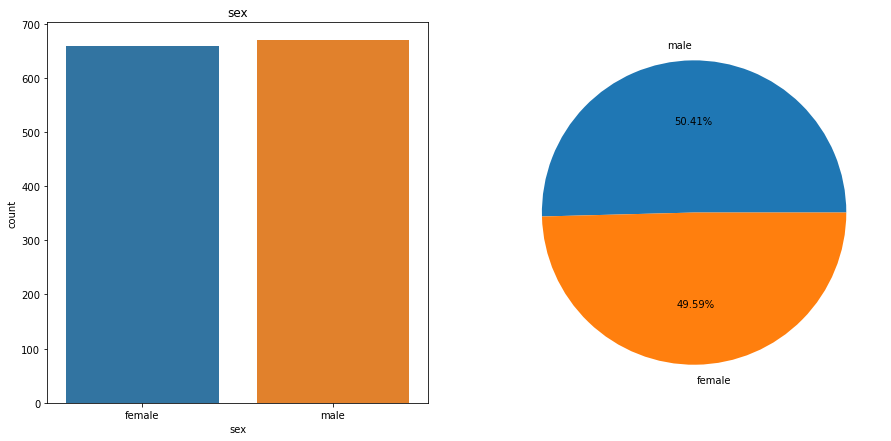

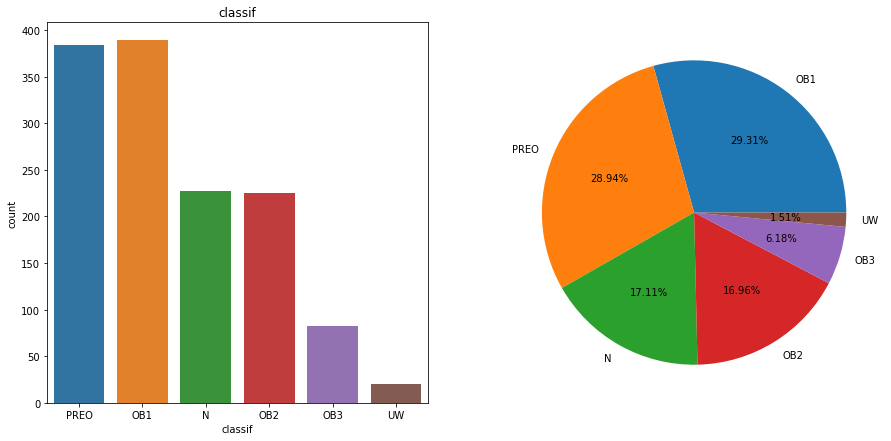

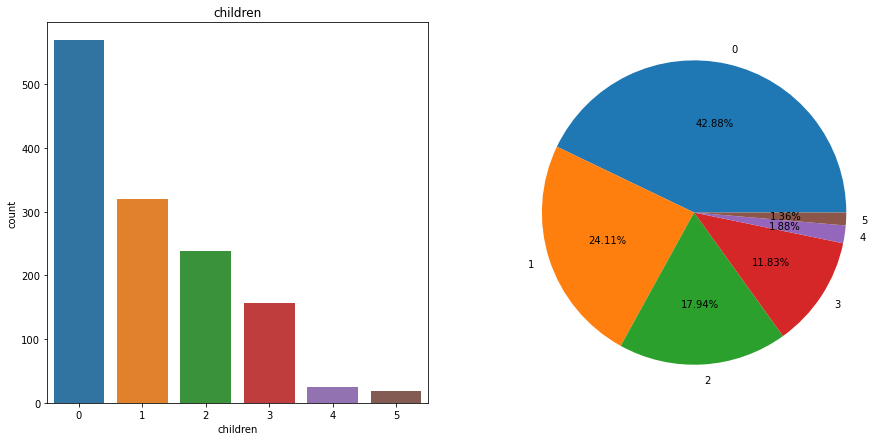

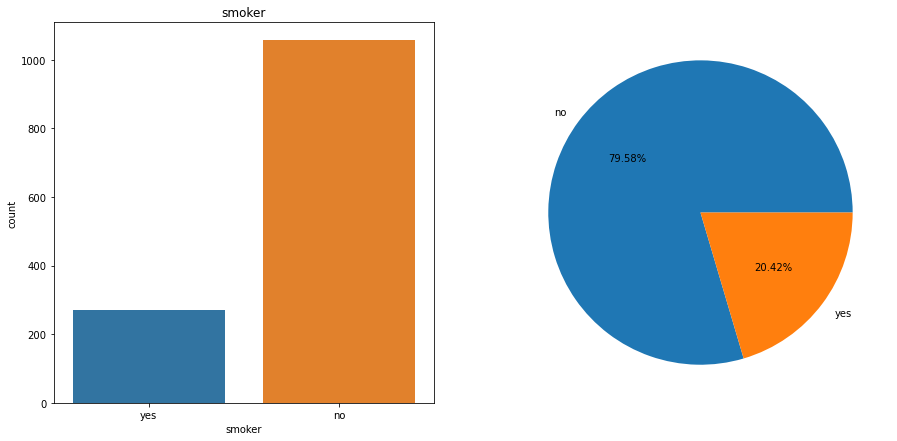

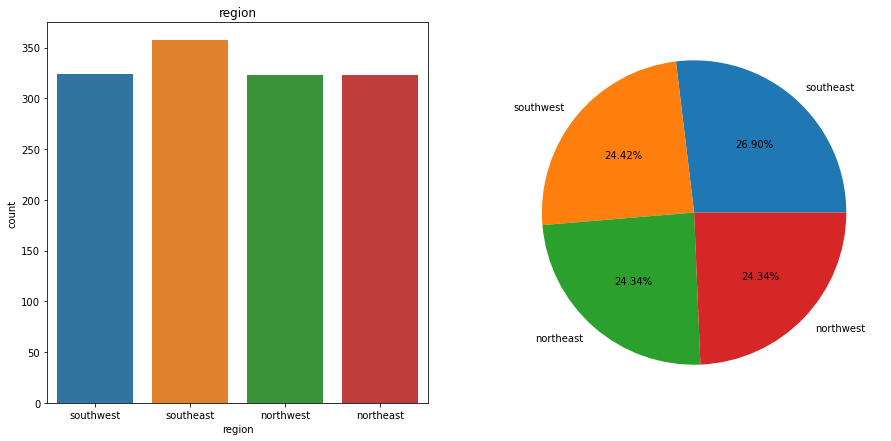

In [27]:
for i in categorical:
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    ax[0].set_title(i)


    percentage=insurance_data[i].value_counts()
    # counting the values 

    labels=list(insurance_data[i].value_counts().index)
    # convert the index of the value counts into the list

    sns.countplot(x=insurance_data[i],ax=ax[0])
    plt.pie(percentage,labels=labels,autopct="%0.2f%%")
    plt.show()

### interpretaion 1: around 60 % popluation  having BMI between 25-35 which means they are not normal and falls under the category of pre-obesity and obesity 1 type


### interpretation 2:around 43 %  population have no children and 24 % have 1 child.

### interpretaton 3: density are equally distributed among all the regions.

## plotting for numerical columns

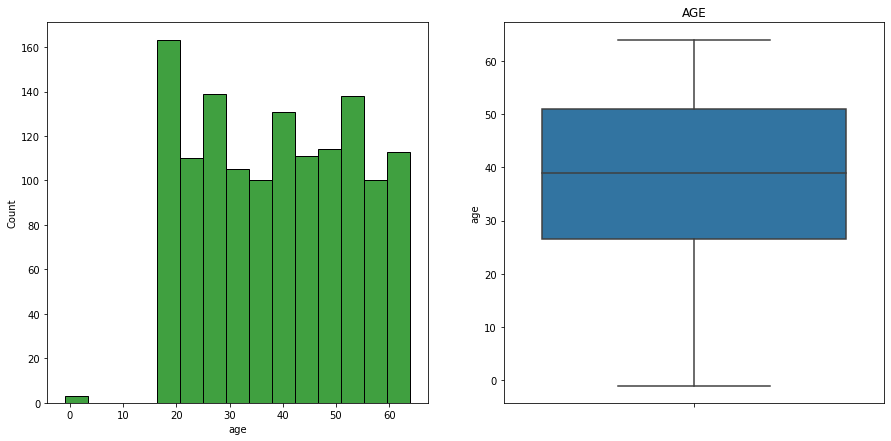

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=insurance_data['age'],ax=ax[0],color='g')
sns.boxplot(y=insurance_data['age'],ax=ax[1]).set(title='AGE')
plt.show()

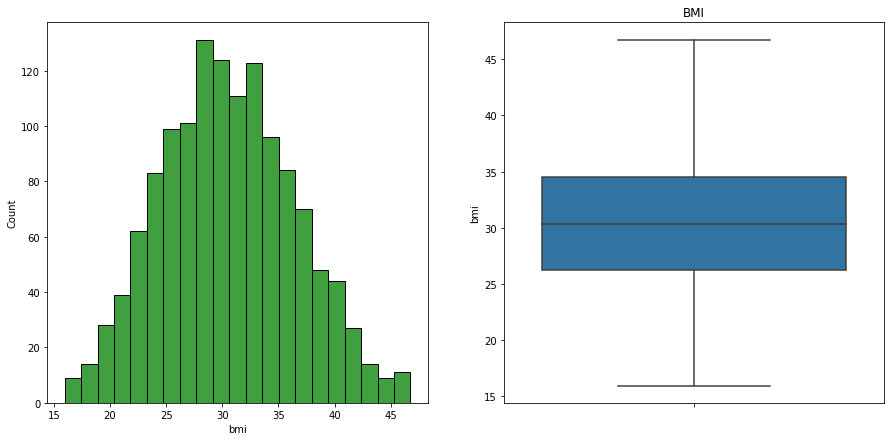

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.histplot(x=insurance_data['bmi'],ax=ax[0],color='g')
sns.boxplot(y=insurance_data['bmi'],ax=ax[1]).set(title='BMI')
plt.show()

In [30]:
#### checking correlation 

corr_table=insurance_data.corr()
corr_table


,age,bmi,children,charges
age,1.000000,0.119984,0.048281,0.293138
bmi,0.119984,1.000000,0.017366,0.193328
children,0.048281,0.017366,1.000000,0.068535
charges,0.293138,0.193328,0.068535,1.000000


In [31]:
def corr_col(dependent): 
    # correlation matrix
    k = len(corr_table.columns)
    cols = corr_table.nlargest(k, dependent)[dependent].index
    cm = np.corrcoef(insurance_data[cols].values.T)
    sns.set(font_scale=1.25)
    f, ax = plt.subplots(figsize=(9, 9))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    d=zip(cm[0],cols)
    l_1=[]
    for _ in d:
        l_1.append(_)
    return(pd.DataFrame(l_1,columns=['Corr_value','Col_name']))

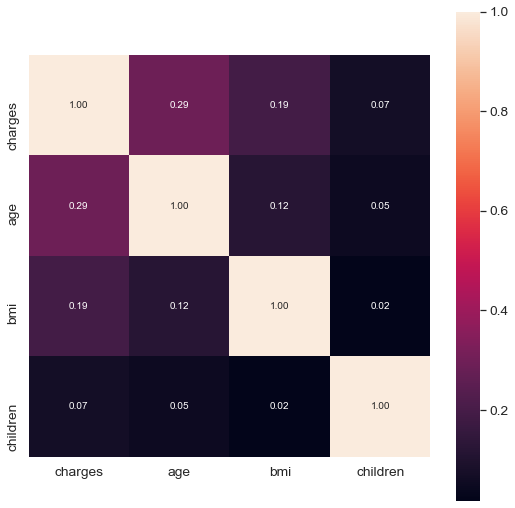

,Corr_value,Col_name
0,1.000000,charges
1,0.293138,age
2,0.193328,bmi
3,0.068535,children


In [32]:
corr_col('charges')

In [33]:
# check for singularities
for i in insurance_data.columns:
        print("columns name = ",i)
        print(insurance_data[i].value_counts() / len(insurance_data))

columns name =  age
 18    0.051243
 19    0.049736
 50    0.021854
 20    0.021854
 51    0.021854
 45    0.021854
 48    0.021854
 53    0.021100
 46    0.021100
 47    0.021100
 28    0.021100
 27    0.021100
 26    0.021100
 25    0.021100
 24    0.021100
 49    0.021100
 21    0.021100
 52    0.021100
 44    0.020347
 43    0.020347
 42    0.020347
 41    0.020347
 40    0.020347
 54    0.020347
 31    0.020347
 30    0.020347
 29    0.020347
 23    0.020347
 22    0.020347
 55    0.019593
 56    0.019593
 57    0.019593
 34    0.019593
 32    0.019593
 59    0.018839
 38    0.018839
 39    0.018839
 36    0.018839
 35    0.018839
 33    0.018839
 37    0.018086
 63    0.017332
 62    0.017332
 58    0.017332
 60    0.017332
 64    0.016579
 61    0.016579
 0     0.001507
-1     0.000754
Name: age, dtype: float64
columns name =  sex
male      0.504145
female    0.495855
Name: sex, dtype: float64
columns name =  bmi
32.300    0.009797
28.310    0.006782
30.875    0.006029
28.880   

# Bivariate

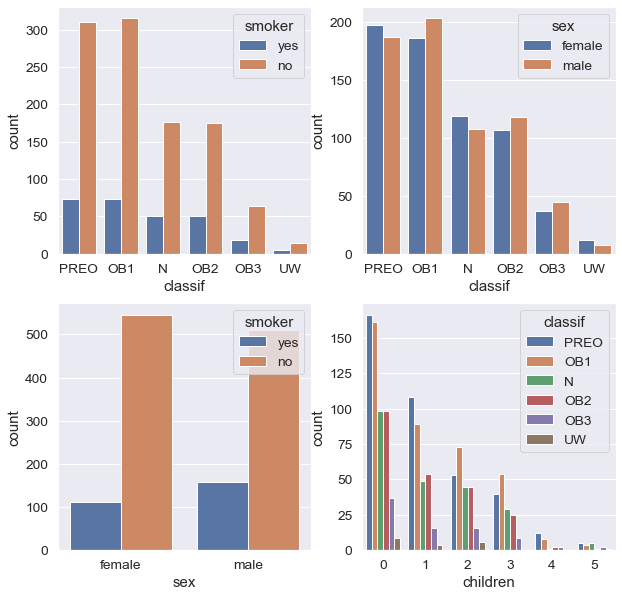

In [34]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='classif',hue='smoker',data=insurance_data,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='classif',hue='sex',data=insurance_data,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='sex',hue='smoker',data=insurance_data,ax=ax[1,0])
ax[1,0].set_title('')
sns.countplot(x='children',hue='classif',data=insurance_data,ax=ax[1,1])
ax[1,1].set_title('')
plt.show()                 

<AxesSubplot:title={'center':'Premium charges with region'}, xlabel='region', ylabel='charges'>

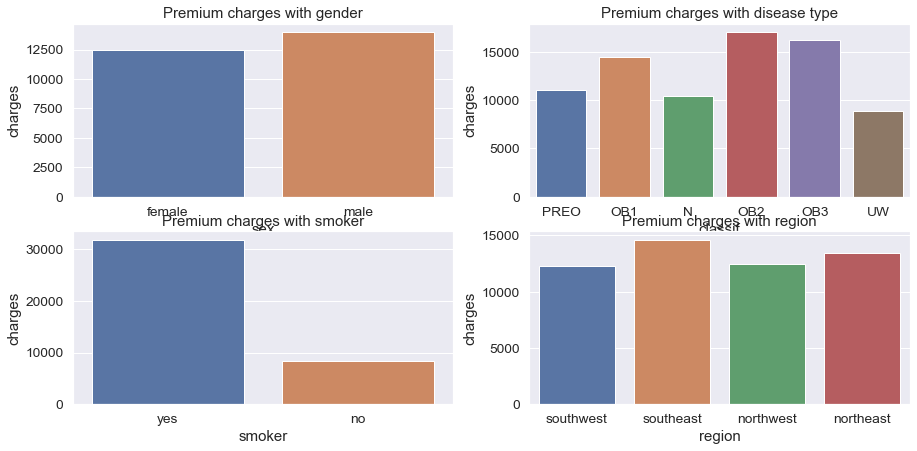

In [35]:
fig,ax = plt.subplots( 2,2,figsize=(15,7))
ax[0,0].set_title('Premium charges with gender')
ax[0,1].set_title('Premium charges with disease type')
ax[1,0].set_title('Premium charges with smoker')
ax[1,1].set_title('Premium charges with region')

sns.barplot(y=insurance_data['charges'], x=insurance_data['sex'],ci=None,ax=ax[0,0])
sns.barplot(y=insurance_data['charges'], x=insurance_data['classif'],ci=None,ax=ax[0,1])
sns.barplot(y=insurance_data['charges'], x=insurance_data['smoker'],ci=None,ax=ax[1,0])
sns.barplot(y=insurance_data['charges'], x=insurance_data['region'],ci=None,ax=ax[1,1])

## iterpretation 1: smoker are more likely to fall ill that's  the another reason of high premium rates

### Multivariate

C:\Users\krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


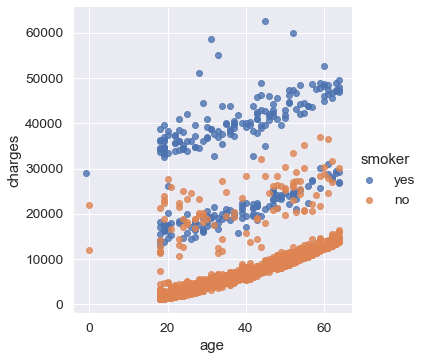

In [36]:
sns.lmplot("age", "charges", insurance_data, hue="smoker", fit_reg=False);

#### interpretation : as age increase we can see that it directly impacts the  premium charges and also we can observe that smoker are paying high premium compare to no smoker

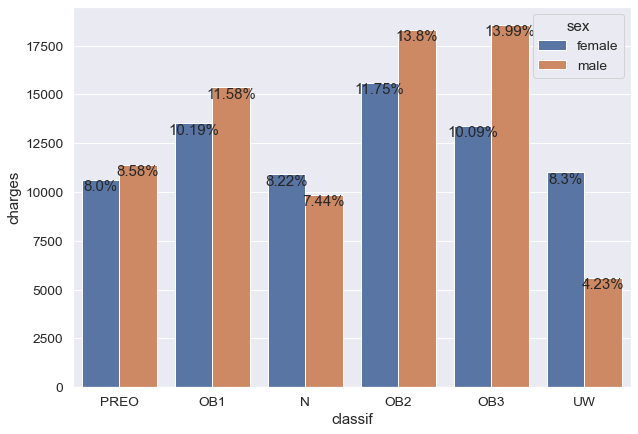

In [37]:
fig,ax= plt.subplots(figsize=(10,7))
#sns.barplot(x='rent amount (R$)',hue='city',data=df1)
sns.barplot(x=insurance_data['classif'],y=insurance_data['charges'],hue=insurance_data['sex'],ci=None,ax=ax)
count=len(insurance_data['smoker'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

#### interpretation 1:OB2 and OB3 types are having high premium rates as chances of getting stroke in these categories are quit high.Obesity increases the risk of several debilitating, and deadly diseases, including diabetes, heart disease, and some cancers.

## Creating dummies

In [38]:
sex = pd.get_dummies(insurance_data.sex, prefix= 'sex')
smoker = pd.get_dummies(insurance_data.smoker, prefix= 'smoker')
region = pd.get_dummies(insurance_data.region, prefix= 'region')
classif = pd.get_dummies(insurance_data.classif, prefix= 'classif')
insurance_data=  pd.concat([insurance_data,sex,smoker,classif,region],axis='columns')

In [39]:
insurance_data

,age,sex,bmi,classif,children,smoker,region,charges,sex_female,sex_male,...,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,1,0,...,0,0,0,0,1,0,0,0,0,1
1,18,male,33.770,OB1,1,no,southeast,1725.55230,0,1,...,0,1,0,0,0,0,0,0,1,0
2,28,male,33.000,OB1,3,no,southeast,4449.46200,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,male,22.705,N,0,no,northwest,21984.47061,0,1,...,1,0,0,0,0,0,0,1,0,0
4,32,male,28.880,PREO,0,no,northwest,3866.85520,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830,0,1,...,0,1,0,0,0,0,0,1,0,0
1334,18,female,31.920,OB1,0,no,northeast,2205.98080,1,0,...,0,1,0,0,0,0,1,0,0,0
1335,18,female,36.850,OB2,0,no,southeast,1629.83350,1,0,...,0,0,1,0,0,0,0,0,1,0
1336,21,female,25.800,PREO,0,no,southwest,2007.94500,1,0,...,0,0,0,0,1,0,0,0,0,1


In [40]:
insurance_data=insurance_data.drop(['sex', 'smoker','classif','region'], axis = 1)

In [41]:
insurance_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,1,0,0,0,0,0,0,1,0
3,0,22.705,0,21984.47061,0,1,1,0,1,0,0,0,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,0,1,0,0,0,0,1


### data Scaling

In [42]:

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ["age","bmi",'charges']
insurance_data[scale_columns] = std_scaler.fit_transform(insurance_data[scale_columns])

insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423526,-0.445333,0,0.304787,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,-1.494281,0.545857,1,-0.959160,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,-0.786730,0.415837,3,-0.732048,0,1,1,0,0,1,0,0,0,0,0,0,1,0
3,-2.767872,-1.322544,0,0.729973,0,1,1,0,1,0,0,0,0,0,0,1,0,0
4,-0.503710,-0.279853,0,-0.780624,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [43]:
from sklearn.model_selection import train_test_split

target_names='charges'

y=insurance_data[target_names]

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [44]:
y=insurance_data['charges']

### feature selection

In [45]:
for columns in insurance_data.columns:
    x=insurance_data[[columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print(columns)
    print("-"*50)

MSE = 0.7722766202105918
r2 score is  0.10764233350461894
test_size=0.2,random_state=1
age
--------------------------------------------------
MSE = 0.8544009294027504
r2 score is  0.012748541571262373
test_size=0.2,random_state=1
bmi
--------------------------------------------------
MSE = 0.8667132636658783
r2 score is  -0.001478233634181425
test_size=0.2,random_state=1
children
--------------------------------------------------
MSE = 1.7221189510478168e-31
r2 score is  1.0
test_size=0.2,random_state=1
charges
--------------------------------------------------
MSE = 0.888307702662241
r2 score is  -0.02643038508843154
test_size=0.2,random_state=1
sex_female
--------------------------------------------------
MSE = 0.888307702662241
r2 score is  -0.02643038508843154
test_size=0.2,random_state=1
sex_male
--------------------------------------------------
MSE = 0.3414990301354438
r2 score is  0.605401394180493
test_size=0.2,random_state=1
smoker_no
-----------------------------------------

In [46]:
for columns in insurance_data.columns:
    x=insurance_data[['smoker_no','smoker_yes',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes'",columns)
    print("-"*50)

MSE = 0.22861502264783937
r2 score is  0.735837700123326
test_size=0.2,random_state=1
'smoker_no','smoker_yes' age
--------------------------------------------------
MSE = 0.29237488307172754
r2 score is  0.662163839261894
test_size=0.2,random_state=1
'smoker_no','smoker_yes' bmi
--------------------------------------------------
MSE = 0.3430766418996948
r2 score is  0.6035784800643065
test_size=0.2,random_state=1
'smoker_no','smoker_yes' children
--------------------------------------------------
MSE = 2.8683419723464466e-31
r2 score is  1.0
test_size=0.2,random_state=1
'smoker_no','smoker_yes' charges
--------------------------------------------------
MSE = 0.3415415862987572
r2 score is  0.6053522209728683
test_size=0.2,random_state=1
'smoker_no','smoker_yes' sex_female
--------------------------------------------------
MSE = 0.3415415862987572
r2 score is  0.6053522209728683
test_size=0.2,random_state=1
'smoker_no','smoker_yes' sex_male
---------------------------------------------

In [47]:
for columns in insurance_data.columns:
    x=insurance_data[['smoker_no','smoker_yes','age',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes','age'",columns)
    print("-"*50)

MSE = 0.2286150226478394
r2 score is  0.735837700123326
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' age
--------------------------------------------------
MSE = 0.19940188014780724
r2 score is  0.7695931848681796
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' bmi
--------------------------------------------------
MSE = 0.2348798711507982
r2 score is  0.7285987323173047
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' children
--------------------------------------------------
MSE = 1.149002292970608e-31
r2 score is  1.0
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' charges
--------------------------------------------------
MSE = 0.22862003924975893
r2 score is  0.735831903491568
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' sex_female
--------------------------------------------------
MSE = 0.22862003924975893
r2 score is  0.735831903491568
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' sex_male
----------

In [48]:
for columns in insurance_data.columns:
    x=insurance_data[['smoker_no','smoker_yes','age','bmi',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes','age','bmi'",columns)
    print("-"*50)

MSE = 0.19940188014780724
r2 score is  0.7695931848681796
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' age
--------------------------------------------------
MSE = 0.19940188014780724
r2 score is  0.7695931848681796
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' bmi
--------------------------------------------------
MSE = 0.204105141620194
r2 score is  0.764158614763918
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' children
--------------------------------------------------
MSE = 5.92607761471742e-32
r2 score is  1.0
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' charges
--------------------------------------------------
MSE = 0.20014583866704877
r2 score is  0.7687335484751748
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' sex_female
--------------------------------------------------
MSE = 0.2001458386670488
r2 score is  0.7687335484751748
test_size=0.2,random_state=1
'smoker_no','smoker_

In [49]:
for columns in insurance_data.columns:
    x=insurance_data[['smoker_no','smoker_yes','age','bmi', 'classif_N', 'classif_OB1', 'classif_OB2',
       'classif_OB3', 'classif_PREO', 'classif_UW',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print('smoker_no','smoker_yes','age','bmi', 'classif_N', 'classif_OB1', 'classif_OB2',
       'classif_OB3', 'classif_PREO', 'classif_UW', columns)
    print("-"*50)

MSE = 0.19584133488179342
r2 score is  0.7737073581862387
test_size=0.2,random_state=1
smoker_no smoker_yes age bmi classif_N classif_OB1 classif_OB2 classif_OB3 classif_PREO classif_UW age
--------------------------------------------------
MSE = 0.19584133488179337
r2 score is  0.7737073581862387
test_size=0.2,random_state=1
smoker_no smoker_yes age bmi classif_N classif_OB1 classif_OB2 classif_OB3 classif_PREO classif_UW bmi
--------------------------------------------------
MSE = 0.20180503714388767
r2 score is  0.7668163617543844
test_size=0.2,random_state=1
smoker_no smoker_yes age bmi classif_N classif_OB1 classif_OB2 classif_OB3 classif_PREO classif_UW children
--------------------------------------------------
MSE = 3.1184837762929274e-31
r2 score is  1.0
test_size=0.2,random_state=1
smoker_no smoker_yes age bmi classif_N classif_OB1 classif_OB2 classif_OB3 classif_PREO classif_UW charges
--------------------------------------------------
MSE = 0.19721618214577788
r2 score is  

In [50]:
insurance_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'classif_N', 'classif_OB1', 'classif_OB2',
       'classif_OB3', 'classif_PREO', 'classif_UW', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [51]:
for columns in insurance_data.columns:
    x=insurance_data[['smoker_no','smoker_yes','age','bmi', 'classif_N', 'classif_OB1', 'classif_OB2',
       'classif_OB3', 'classif_PREO', 'classif_UW','region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes','age','bmi'",columns)
    print("-"*50)

MSE = 0.19498076386298077
r2 score is  0.7747017391193192
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' age
--------------------------------------------------
MSE = 0.1949807638629808
r2 score is  0.774701739119319
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' bmi
--------------------------------------------------
MSE = 0.20053880552120323
r2 score is  0.7682794793297336
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' children
--------------------------------------------------
MSE = 3.0176708579610885e-30
r2 score is  1.0
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' charges
--------------------------------------------------
MSE = 0.1963467568639139
r2 score is  0.7731233483007167
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' sex_female
--------------------------------------------------
MSE = 0.19634675686391387
r2 score is  0.7731233483007167
test_size=0.2,random_state=1
'smoker_no','smok

#### split data into x & y

In [52]:

y=insurance_data['charges']
#x=insurance_data.drop(target_names, axis=1)
x=insurance_data[['smoker_no','smoker_yes','age','bmi', 'classif_N', 'classif_OB1', 'classif_OB2',
       'classif_OB3', 'classif_PREO', 'classif_UW']]

In [53]:
from sklearn.model_selection import train_test_split



#### spliting into test and train

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0) 

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [57]:
y_test_predicted=model.predict(x_test)
pd.DataFrame(y_test_predicted)

,0
0,-0.595358
1,-0.804360
2,-0.661659
3,-0.451760
4,0.960618
...,...
394,-0.252536
395,0.008994
396,-0.690958
397,0.307840


In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
print("MSE =",mean_squared_error(y_test_predicted,y_test))

MSE = 0.2634759813263158


In [60]:
from sklearn.metrics import r2_score

In [61]:
# predicting the accuracy score
score=r2_score(y_test,y_test_predicted)
print("r2 socre is ",score)

r2 socre is  0.7606211526385646


In [62]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     490.7
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:29:18   Log-Likelihood:                -966.71
No. Observations:                1327   AIC:                             1951.
Df Residuals:                    1318   BIC:                             1998.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
smoker_no       -0.5645      0.020    -27.781      0.000      -0.604      -0.525
smoker_yes       1.4067      0.030     46.376      0.000       1.347       1.466
age              0.2964      0.014     21.270      0.000       0.269       0.324
bmi              0.0319      0.055      0.580      0.562      -0.076       0.140
classif_N       -0.0120      0.077     -0.156      0.876      -0.164       0.139
classif_OB1      0.2767      0.035      7.883      0.000       0.208       0.346
classif_OB2      0.3480      0.074      4.705      0.000       0.203       0.493
classif_OB3      0.2850      0.125      2.273      0.023       0.039       0.531
classif_PREO     0.0259      0.037      0.706      0.480      -0.046       0.098
classif_UW      -0.0814      0.153     -0.532      0.595      -0.381       0.219
==============================================================================
Omnibus:                      325.414   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.759
Skew:                           1.305   Prob(JB):                    3.96e-176
Kurtosis:                       5.793   Cond. No.                     2.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
L_1=[0.20,0.25,0.30]
L_2=[0,1,2,3]

for i in L_1:
    for j in L_2:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=j) 
        model=LinearRegression()
        model.fit(x_train,y_train)
        y_test_predicted=model.predict(x_test)
        print("MSE =",mean_squared_error(y_test_predicted,y_test))
        # predicting the accuracy score
        score=r2_score(y_test,y_test_predicted)
        print("r2 score is ",score)
        print("test_size={},random_state={}".format(i,j))
        print("-"*50)
        



MSE = 0.28442882366810524
r2 score is  0.733367561692108
test_size=0.2,random_state=0
--------------------------------------------------
MSE = 0.19584133488179334
r2 score is  0.7737073581862388
test_size=0.2,random_state=1
--------------------------------------------------
MSE = 0.2630744105056248
r2 score is  0.7260854021126235
test_size=0.2,random_state=2
--------------------------------------------------
MSE = 0.3182754897790269
r2 score is  0.6999786274880491
test_size=0.2,random_state=3
--------------------------------------------------
MSE = 0.2851060073175281
r2 score is  0.7315474574032688
test_size=0.25,random_state=0
--------------------------------------------------
MSE = 0.2509092478335096
r2 score is  0.7307951721480774
test_size=0.25,random_state=1
--------------------------------------------------
MSE = 0.27607121589757677
r2 score is  0.7231384726846593
test_size=0.25,random_state=2
--------------------------------------------------
MSE = 0.2961264165254017
r2 score is

### Out of 25 models of linear regression  we obtained Best score with test_size=0.2 and random _state =1  

## final LR model

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
model=LinearRegression()
model.fit(x_train,y_train)
y_test_predicted=model.predict(x_test)
print("MSE =",mean_squared_error(y_test_predicted,y_test))
# predicting the accuracy score
score=r2_score(y_test,y_test_predicted)
print("r2 score is ",score)
print("test_size={},random_state={}".format(0.2,1))
print("-"*50)

MSE = 0.19584133488179334
r2 score is  0.7737073581862388
test_size=0.2,random_state=1
--------------------------------------------------


In [65]:
mse_LR=mean_squared_error(y_test_predicted,y_test)
r2_LR=r2_score(y_test,y_test_predicted)

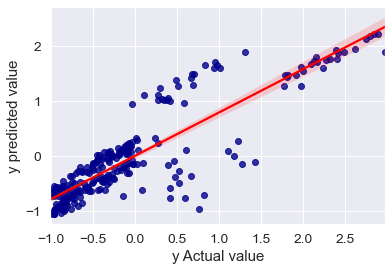

In [66]:
sns.regplot(x=y_test, y=y_test_predicted,
                 scatter_kws={"color": "#00008B"}, line_kws={"color": "red"})
plt.xlabel('y Actual value')
plt.ylabel('y predicted value')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt


In [68]:

#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

0.5050700691608937

### ridge regression

In [69]:
from sklearn.linear_model import Ridge

In [70]:
theRidge=Ridge(alpha=1).fit(x_train,y_train)

In [71]:
y_predict_rigid= theRidge.predict(x_test)


In [72]:
print("the score of the entire data is :",theRidge.score(x_test,y_test))

the score of the entire data is : 0.774170030553876


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [74]:

mean_squared_error(y_test,y_predict_rigid)



0.19544092250707032

In [75]:
mse_ridge=mean_squared_error(y_test,y_predict_rigid)
r2_ridge=theRidge.score(x_test,y_test)

In [76]:
r2_ridge

0.774170030553876

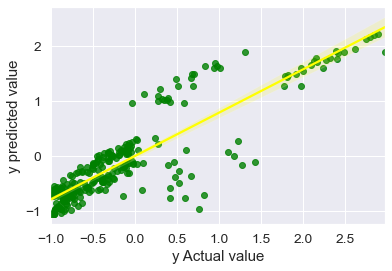

In [77]:
sns.regplot(x=y_test, y=y_predict_rigid,
                 scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
plt.xlabel('y Actual value')
plt.ylabel('y predicted value')
plt.show()

### lasso regression

In [78]:
from sklearn.linear_model import Lasso



In [79]:
myLasso=Lasso(alpha=0.01).fit(x_train,y_train)


In [80]:

prediction_lasso=myLasso.predict(x_test)



In [81]:
mean_squared_error(y_test,prediction_lasso)



0.1963243221345062

In [82]:
print("R-square of the entire data:",myLasso.score(x_test,y_test))

R-square of the entire data: 0.7731492713990713


In [83]:
mse_lasso=mean_squared_error(y_test,prediction_lasso)
r2_lasso=myLasso.score(x_test,y_test)

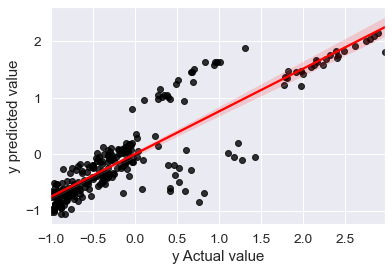

In [84]:
sns.regplot(x=y_test, y=prediction_lasso,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel('y Actual value')
plt.ylabel('y predicted value')
plt.show()

#### DecisionTreeRegressor

In [85]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [86]:

dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))
dtm.fit(x_test,y_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))


R-Squared on train dataset=0.8585727446412657
R-Squared on test dataset=0.8743543886635231


In [87]:
r2_DT=dtm.score(x_train,y_train)


In [88]:
mse_dt = mean_absolute_error(y_test, y_test_predicted)

In [89]:
from sklearn import tree


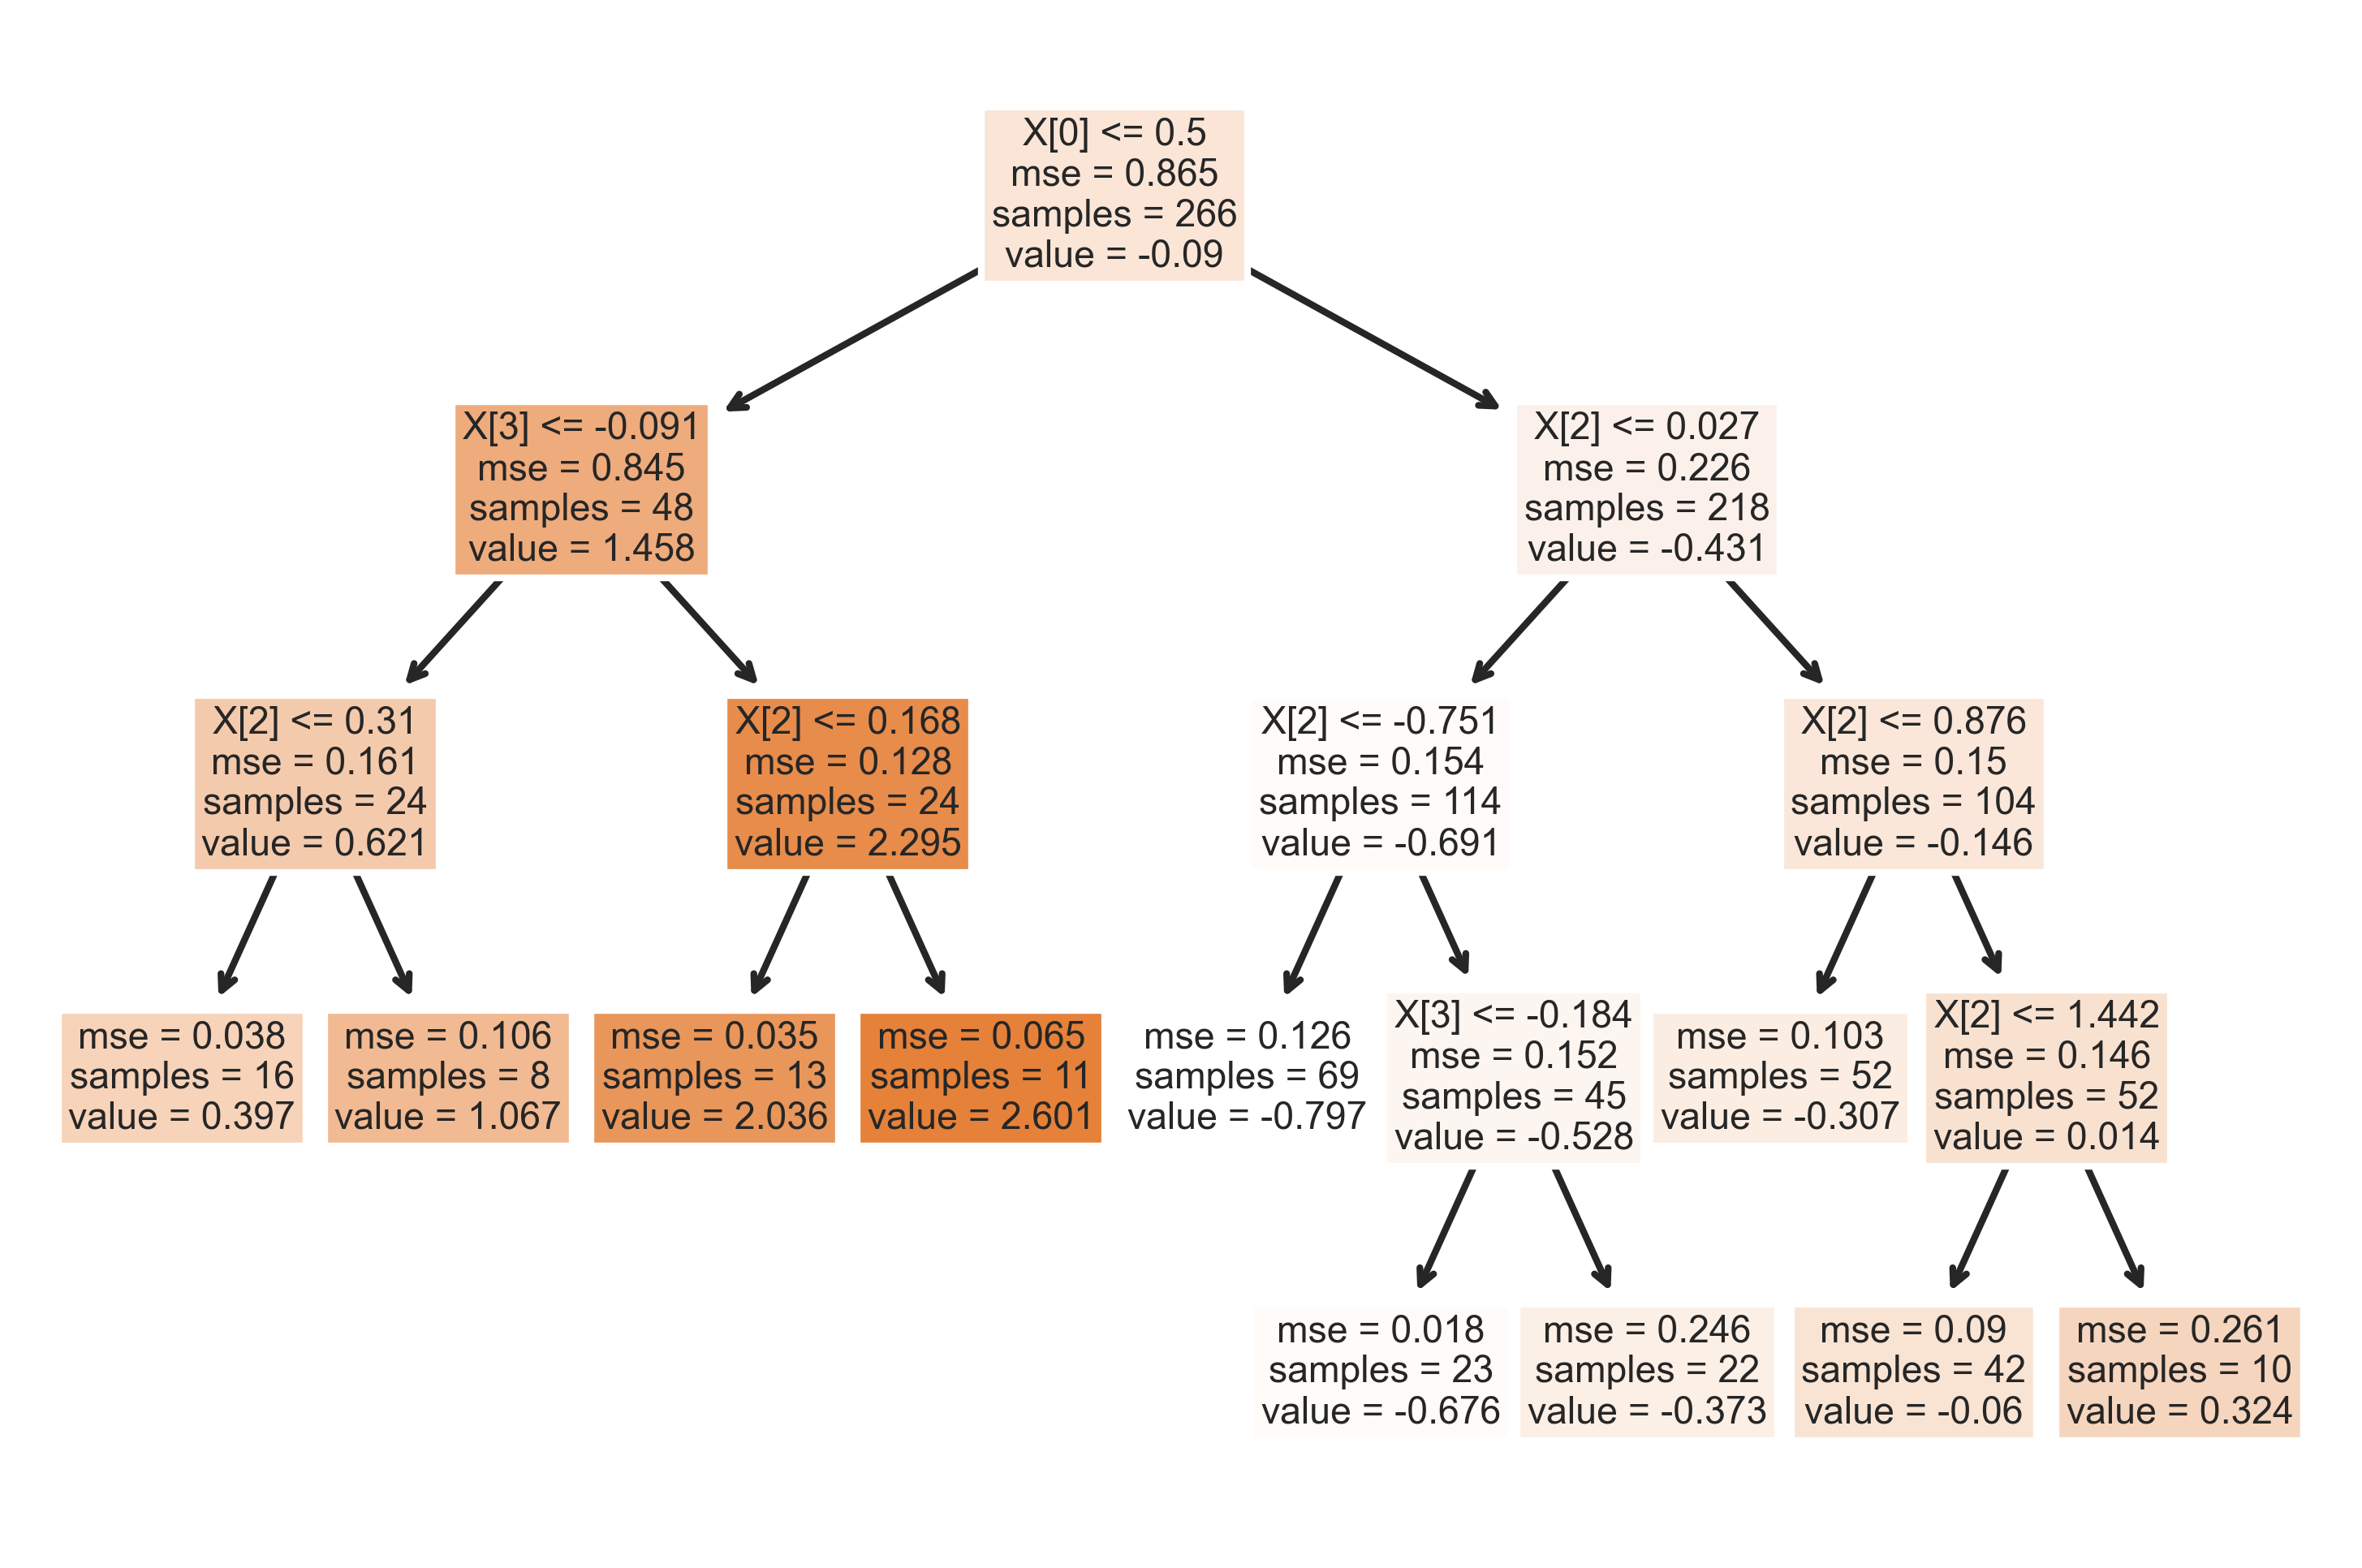

In [90]:
# Setting dpi = 600 to make image clearer than default
fig, axes = plt.subplots(dpi=600)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('pridiction.png')

### Random forest 

In [91]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is ",score)

r2 score is  0.8057644048195238


In [92]:
mse_RF=mean_squared_error(y_test,y_pred)

In [93]:
r2_RF=r2_score(y_test,y_pred)


In [94]:
series_pred = pd.Series(y_pred)


In [95]:
df1 = pd.DataFrame(data=series_pred, columns=['prediction'])
df = pd.merge(df1, y_test, left_index=True, right_index=True)
df.head()

,prediction,charges
6,0.047543,-0.415954
8,-0.706493,-0.568883
12,-0.589020,-0.950714
19,-0.022940,1.968375
27,-0.821303,-0.080107


#### KNeighborsRegressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
k=[]
accuracy=[]
for i in np.arange(1,20,2):
    model = KNeighborsRegressor(n_neighbors=i)
    
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    acc_log = round(model.score(x_train, y_train) * 100, 2)
    k.append(i)
    accuracy.append(acc_log)

In [98]:
k

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [99]:
d=dict(zip(k,accuracy))
d

{1: 99.11,
 3: 89.91,
 5: 87.99,
 7: 87.47,
 9: 86.96,
 11: 86.49,
 13: 86.04,
 15: 85.23,
 17: 84.48,
 19: 83.74}

## Finding max k values

In [100]:
max_key = max(d, key=d.get)
print(max_key)

1


#### since for k value =1 we are getting very low bias   so it case of overfitting  so we  can choose  k values as 3 or 5

In [101]:
model = KNeighborsRegressor(n_neighbors=3)
    
model.fit(x_train, y_train)
Y_pred = model.predict(x_test)
acc_log = round(model.score(x_train, y_train) * 100, 2)
acc_log

89.91

In [102]:
acc_KNN=model.score(x_train, y_train)
mse_knn=metrics.mean_absolute_error(y_test,Y_pred)

In [103]:
series_pred = pd.Series(Y_pred)


df1 = pd.DataFrame(data=series_pred, columns=['prediction'])
df = pd.merge(df1, y_test, left_index=True, right_index=True)
df.head()

,prediction,charges
6,-0.184268,-0.415954
8,-0.791115,-0.568883
12,-0.609493,-0.950714
19,-0.043631,1.968375
27,-0.932822,-0.080107


### final  comparison of all the models

In [104]:
DF_comp=pd.DataFrame({'MSE':[mse_LR,mse_ridge,mse_lasso,mse_RF,mse_dt,mse_knn],'R2':[r2_LR,r2_ridge,r2_lasso,r2_DT,r2_RF,acc_KNN]})
DF_comp = DF_comp.rename(index={0: "LR" ,1:"ridge",2:"lasso",3:"RandomForest",4:"DecisionTree",5:"KNN"})


In [105]:
DF_comp

,MSE,R2
LR,0.195841,0.773707
ridge,0.195441,0.774170
lasso,0.196324,0.773149
RandomForest,0.168098,0.837146
DecisionTree,0.316081,0.805764
KNN,0.242087,0.899072
